In [1]:
from plot_utils import *

# The sync-greedy algorithm (Part2) 

In [2]:
ns = [20,40,80]
kappa = 0.1
dfs = {}

In [3]:
n = 80
t=7
"""
df_energies_annealed = load_df(f'sync-eo-comparison_BDCM-t_wanted=7-n={n}-annealed_lt' ,pre_loaded=False)
_dfa = df_energies_annealed[df_energies_annealed.h == kappa]
g = _dfa[np.logical_and(_dfa.c==1,_dfa.transient==t)]
fields = np.concatenate(g.xfields.values)/np.sqrt(n)
np.save(CLEAN_DIR /  'fields_annealed.npy', fields)

df_energies_quenched = load_df(f'sync-eo-comparison_BDCM-t_wanted=7-n={n}-quenched_lt'  ,pre_loaded=False)
_dfq = df_energies_quenched[df_energies_quenched.h == kappa]
g = _dfq[np.logical_and(_dfq.c==1,_dfq.transient==t)]
fields = np.concatenate(g.xfields.values)/np.sqrt(n)
np.save(CLEAN_DIR / 'fields_quenched.npy', fields)
""";

In [4]:
valid = np.concatenate([np.arange(-0.1,0.0,step=0.02),np.linspace(0,0.5,25)])
def valid_mask(df):
    return np.isclose(df.h.values[:, None], valid, atol=.001).any(axis=1)

In [5]:
for n in [20,40,80]:
    print(n)
    #"""
    df_energies_annealed_lt = pd.concat([load_df(f'sync-eo-comparison_BDCM-t_wanted=7-n={n}-annealed_lt' ,pre_loaded=False),
                                         load_df(f'sync-eo-comparison_BDCM-t_wanted=7-n={n}-annealed_lt_negkappa_2' ,pre_loaded=False)])
    df_energies_annealed_lt = df_energies_annealed_lt[valid_mask(df_energies_annealed_lt)]
    
    if n == 80:
        # data below 0.02 has too few samples
        df_energies_annealed_lt = df_energies_annealed_lt[df_energies_annealed_lt.h > 0.02]
    
    df_energies_annealed_lt = df_energies_annealed_lt.groupby(['c','h']).mean().reset_index()
    df_energies_annealed_lt.to_csv(CLEAN_DIR / f'df_energies_annealed_lt_{n=}.csv',index=None)
    

    df_energies_quenched_lt = pd.concat([load_df(f'sync-eo-comparison_BDCM-t_wanted=7-n={n}-quenched_lt'  ,pre_loaded=False),
                                         load_df(f'sync-eo-comparison_BDCM-t_wanted=7-n={n}-quenched_lt_negkappa_2'  ,pre_loaded=False)])
    
    df_energies_quenched_lt = df_energies_quenched_lt[valid_mask(df_energies_quenched_lt)]

    if n == 80:
        # data below 0.02 has too few samples
        df_energies_quenched_lt = df_energies_quenched_lt[df_energies_quenched_lt.h > 0.02]
    
    df_energies_quenched_lt = df_energies_quenched_lt.groupby(['c','h']).mean().reset_index()
    df_energies_quenched_lt.to_csv(CLEAN_DIR / f'df_energies_quenched_lt_{n=}.csv',index=None)
    #"""
    
    
    df_energies_annealed_lt = pd.read_csv(CLEAN_DIR / f'df_energies_annealed_lt_{n=}.csv')
    df_energies_quenched_lt = pd.read_csv(CLEAN_DIR / f'df_energies_quenched_lt_{n=}.csv')
    
    dfs[n] = (df_energies_annealed_lt,df_energies_quenched_lt)

20
Loading raw results
Loading raw results
Loading raw results
Loading raw results
40
Loading raw results
Loading raw results
Loading raw results
Loading raw results
80
Loading raw results
Loading raw results
Loading raw results
Loading raw results


In [6]:
df = pd.read_csv('results/theory/fd_eo_energy.csv')
res = []
for i, row in df.iterrows():
    for p, e in enumerate(ast.literal_eval(row.energy.replace('NaN','-1'))):
        res.append({'keo': row.keo,'energy':np.nan if e == -1 else e,'p':p})
df_theory_forward_dcm = pd.DataFrame(res).sort_values(by='keo')

df_theory_back_dcm = pd.read_csv('results/theory/data_syncGR_BK.csv') 

In [7]:
cmap = mpl.colormaps['GnBu']

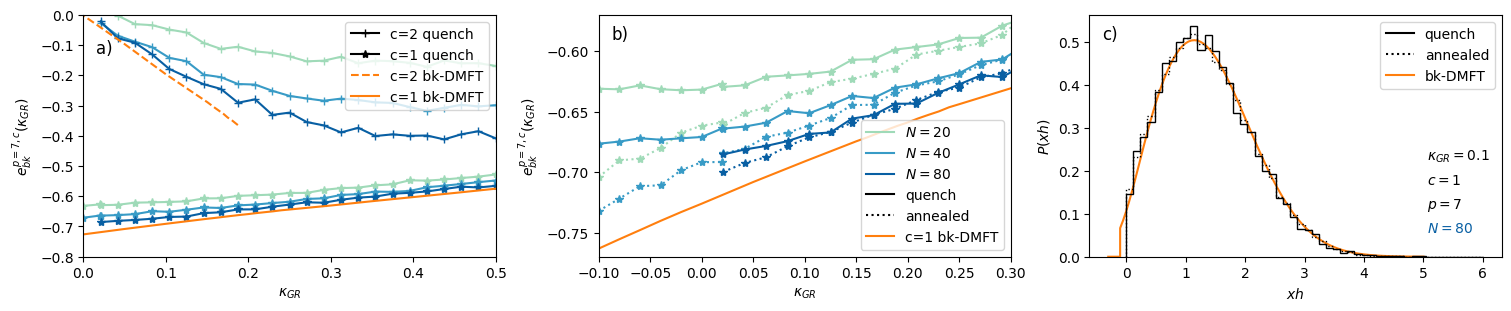

In [8]:
fig, axes = plt.subplots(1,3,figsize=(3*width,1*height), constrained_layout=True)
axes =axes.flatten()
ax = axes[0]
ns = [20,40,80]
colors = ['tab:blue','tab:red','tab:orange','tab:green']
colors = [cmap(0.4),cmap(0.7),cmap(0.9)]
for n, color in zip(ns, colors):
    annealed, quenched = dfs[n]
    annealed = annealed[~annealed.h.isin([0.1,0.15,0.3])]
    quenched = quenched[~quenched.h.isin([0.1,0.15,0.3])]
    for c, g in quenched.groupby('c'):
        df = g.groupby('h').mean().reset_index()
        ax.plot(df.h,df.energy,marker='+'if c == 2 else '*',c=color)
    
P = 7
ax.set_xlabel('$\kappa_{GR}$')
ax.set_ylabel('$e_{bk}^{p=7,c}(\kappa_{GR})$')
for (c,p,bc), g in df_theory_back_dcm.groupby(['c','p','bc']):
    if p == P and bc != -1:
        ax.plot(g.keo,g.energy,linestyle='dashed' if c == 2 else 'solid',color='tab:orange')


ax.plot([],[],marker='+',label='c=2 quench',c='black')
ax.plot([],[],marker='*',label='c=1 quench',c='black')
ax.plot([],[],c='tab:orange',label=f'c=2 bk-DMFT',linestyle='dashed')
ax.plot([],[],c='tab:orange',label=f'c=1 bk-DMFT')


ax.legend(loc='upper right')
ax.set_xlim(0,0.5)
ax.set_ylim(-0.8,0.0)
#ax.set_title(f'n=50,p={P}')


# todo: comapre theory - quenched and annealed for n= 100
ax = axes[1]
ns = [20,40,80]
for n, color in zip(ns, colors):
    annealed, quenched = dfs[n]
    annealed = annealed[~annealed.h.isin([0.1,0.15,0.3])]
    quenched = quenched[~quenched.h.isin([0.1,0.15,0.3])]
    for c, g in quenched.groupby('c'):
        df = g.groupby('h').mean().reset_index()
        ax.plot(df.h,df.energy,marker='+'if c == 2 else '*',c=color)
    for c, g in annealed.groupby('c'):
        df = g.groupby('h').mean().reset_index()
        ax.plot(df.h,df.energy,marker='+'if c == 2 else '*',c=color,linestyle='dotted')
P = 7
ax.set_xlabel('$\kappa_{GR}$')
ax.set_ylabel('$e_{bk}^{p=7,c}(\kappa_{GR})$')
for (c,p,bc), g in df_theory_back_dcm.groupby(['c','p','bc']):
    if p == P and c==1:
        g = g.groupby('keo').mean().reset_index()
        ax.plot(g.keo,g.energy,linestyle='dashed' if c == 2 else 'solid',color='tab:orange')
for n, color in zip(ns,colors):
    ax.plot([],[],c=color,label=f'$N={n}$')
ax.plot([],[],c='black',label=f'quench',linestyle='solid')
ax.plot([],[],c='black',label=f'annealed',linestyle='dotted')
ax.plot([],[],c='tab:orange',label=f'c=1 bk-DMFT')

ax.legend()
ax.set_xlim(-0.1,0.3)
ax.set_ylim(-0.77,-0.57)
#ax.axhline(-gs,c='grey',linestyle='dashed')

ax = axes[2]
ns = [20,40,80]
t = 7
kappa = 0.1
df_theory=pd.read_csv(f"results/theory/distribution_fitnesses_xh_c1_kgr{kappa}.csv")
df_theory.xhs = df_theory.xhs.apply(ast.literal_eval)
df_theory.p_xhs = df_theory.p_xhs.apply(ast.literal_eval)
df_theory.set_index('p',inplace=True)
ax.plot(df_theory.loc[t].xhs,df_theory.loc[t].p_xhs,c='tab:orange')

fields = np.load(CLEAN_DIR / 'fields_annealed.npy')
hist, bin_edges, _ = ax.hist(fields,density=True,bins=50,histtype='step',alpha=1.0,range=(0,6),color='black',linestyle='dotted')

fields = np.load(CLEAN_DIR / 'fields_quenched.npy')
hist, bin_edges, _ = ax.hist(fields,density=True,bins=50
                             ,histtype='step',alpha=1.0,range=(0,6),color='black')

x = np.linspace(-0.2,1,100)
ax.text(0.82, 0.4,r'$\kappa_{GR}='+f'{kappa}$', fontsize=10, transform=ax.transAxes)
ax.text(0.82, 0.3,f'$c=1$', fontsize=10,transform=ax.transAxes)
ax.text(0.82, 0.2,f'$p=7$', fontsize=10,transform=ax.transAxes)
ax.text(0.82, 0.1,f'$N=80$', fontsize=10, color=colors[2],transform=ax.transAxes)
ax.set_xlabel('$xh$')
ax.set_ylabel('$P(xh)$')

ax.plot([],[],c='black',label=f'quench',linestyle='solid')
ax.plot([],[],c='black',label=f'annealed',linestyle='dotted')
ax.plot([],[],c='tab:orange',label=f'bk-DMFT')



axes[2].legend()
axes[0].text(0.03, 0.84, f'a)', fontsize=12, transform=axes[0].transAxes)
axes[1].text(0.03, 0.9, f'b)', fontsize=12, transform=axes[1].transAxes)
axes[2].text(0.03, 0.9, f'c)', fontsize=12, transform=axes[2].transAxes)
#axes[3].text(0.03, 0.9, f'd)', fontsize=12, transform=axes[3].transAxes)
plt.savefig(save_dir / 'Fig_5-sync-eo-empirics-vs-bdcm.png',dpi=300,bbox_inches='tight')